In [13]:
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
model_path = '../pickle/LogisticRegression/gpt35_model.pkl'

In [15]:
data = pd.read_csv('../../preprocessing/StorePreprocessed/GPT35csv.csv')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["label"], test_size=0.2, random_state=42, stratify=data["label"])

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0.0 instead.

In [ ]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(4, 4), max_features=11000)  # dynamic range of features

In [ ]:
# Remove NaN values from the split data
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
param_grid_lr = {
    'C': [6.0, 2.0, 1.0, 0.95, 0.9, 0.8]
}

In [ ]:
lr = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)

In [ ]:
if os.path.exists(model_path):
    # Modell laden
    with open(model_path, 'rb') as file:
        lr_best = pickle.load(file)

else:
    grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
    grid_lr.fit(X_train, y_train)
    lr_best = grid_lr.best_estimator_
y_pred_lr = lr_best.predict(X_test)



/Users/romanoelfken/miniconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
with open(model_path, 'wb') as file:
    pickle.dump(lr_best, file)

In [ ]:
#Evaluate
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      2000
           1       0.93      0.89      0.91      2000

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

Logistic Regression Accuracy: 0.91575


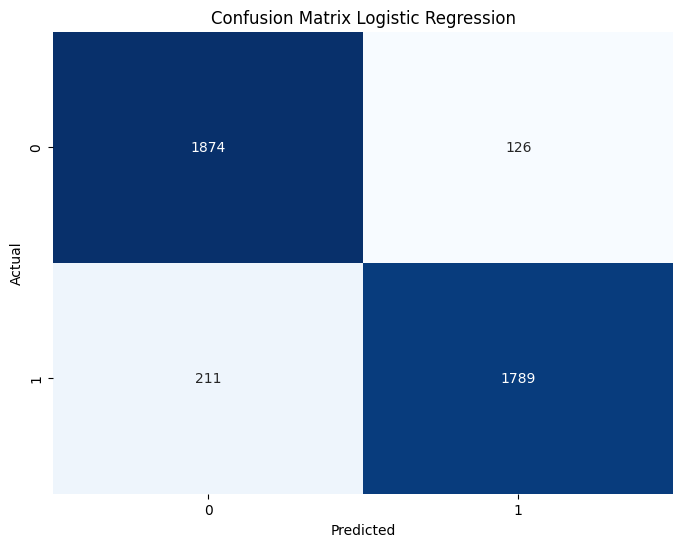

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../../evaluation/GPT35_Evaluation/Confusion_Matrix_Logistic_Regression.png')
plt.show()